In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("mirrorPublications_featured_final.csv")

# Creazione di un dizionario che assegna un numero univoco a ciascun topic
topic_mapping = {topic: i+1 for i, topic in enumerate(df['topic'].unique())}

#codifico topics in one-hot encoding
one_hot_encoded_topics = pd.get_dummies(df['topic'], prefix='topic')
#trasformo i valori True e False in 0 e 1
one_hot_encoded_topics = one_hot_encoded_topics.astype(int)
#concatenazione i risultati con il df originale
df = pd.concat([df, one_hot_encoded_topics], axis=1)

df.loc[:, 'Price(ETH)'] = df['Price(ETH)'].replace(0, 0.0001)
df.loc[:, 'Success'] = (df['Total Sold Numbers'] * df['Price(ETH)']) / (df['Total Buyers'] + 1)

labels = ['Basso', 'Medio-Alto', 'Alto']
df['SuccessClass'] = pd.qcut(df['Success'], q=3, labels=labels) #divisione in percentili, 3 classi circa equiprobabili

class_counts = df['SuccessClass'].value_counts()

class_counts

SuccessClass
Basso         11662
Alto           8958
Medio-Alto     6259
Name: count, dtype: int64

In [3]:
classe_mapping = {'Basso': 0, 'Medio-Alto': 1, 'Alto': 2}
df['SuccessClass'] = df['SuccessClass'].map(classe_mapping)

df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,complex_words,"topic_T1: Gaming, Virtual Worlds & Characters","topic_T2: Wallets, Airdrops & Ethereum Tools","topic_T3: Web3, Blockchain & Digital Platforms","topic_T4: DeFi, Market Strategies & Liquidity","topic_T5: Blockchain, Transactions & Smart Contracts","topic_T6: Web3 Launches, Rewards & Creators","topic_T7: Human Thoughts, Emotions & Reflections",Success,SuccessClass
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.6900,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,13.0,0,0,0,0,0,0,1,0.696509,2
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.4200,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,51.0,0,0,1,0,0,0,0,0.423415,2
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.0420,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,392.0,0,0,0,1,0,0,0,0.048157,2
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.0020,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,117.0,0,0,0,0,0,1,0,0.002029,2
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.0020,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,104.0,0,0,0,1,0,0,0,0.002187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.0001,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,76.0,0,0,0,0,1,0,0,0.000093,1
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.0001,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,234.0,0,1,0,0,0,0,0,0.000067,0
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.0001,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,2.0,0,0,0,0,0,0,1,0.000050,0
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.0001,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,5.0,1,0,0,0,0,0,0,0.000100,2


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers',
    'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 
    'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language',
    'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic",
    'transaction_id', 'Success', 'SuccessClass'])
y = df['SuccessClass']

#suddivido in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#imputo i valori NaN in base alla media
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#standardizzo i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Epoch 1/100
538/538 [==============================] - 1s 754us/step - loss: 1.1222 - accuracy: 0.4562 - val_loss: 1.0688 - val_accuracy: 0.4904
Epoch 2/100
538/538 [==============================] - 0s 638us/step - loss: 1.0833 - accuracy: 0.4920 - val_loss: 1.0577 - val_accuracy: 0.4959
Epoch 3/100
538/538 [==============================] - 0s 691us/step - loss: 1.0701 - accuracy: 0.4962 - val_loss: 1.0504 - val_accuracy: 0.5015
Epoch 4/100
538/538 [==============================] - 0s 639us/step - loss: 1.0578 - accuracy: 0.5063 - val_loss: 1.0458 - val_accuracy: 0.5024
Epoch 5/100
538/538 [==============================] - 0s 723us/step - loss: 1.0554 - accuracy: 0.5075 - val_loss: 1.0405 - val_accuracy: 0.5115
Epoch 6/100
538/538 [==============================] - 0s 637us/step - loss: 1.0470 - accuracy: 0.5094 - val_loss: 1.0357 - val_accuracy: 0.5155
Epoch 7/100
538/538 [==============================] - 0s 643us/step - loss: 1.0414 - accuracy: 0.5149 - val_loss: 1.0352 - val_ac

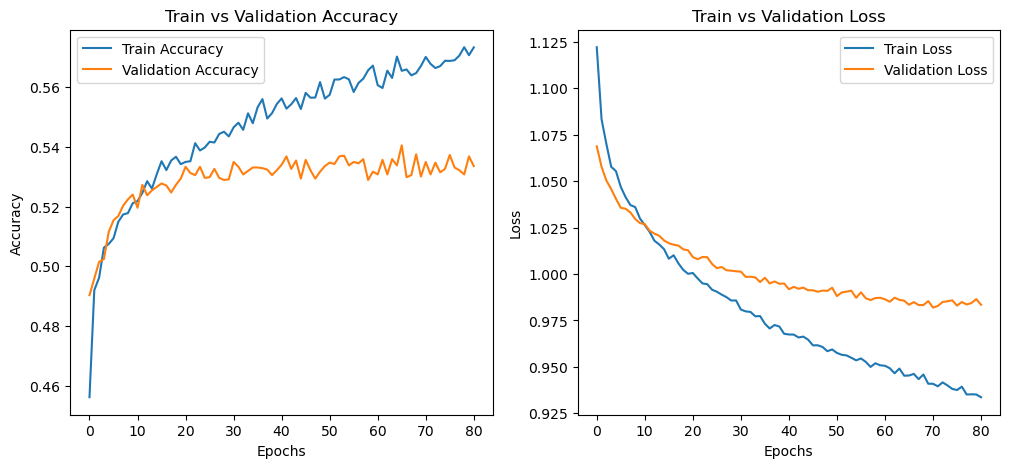

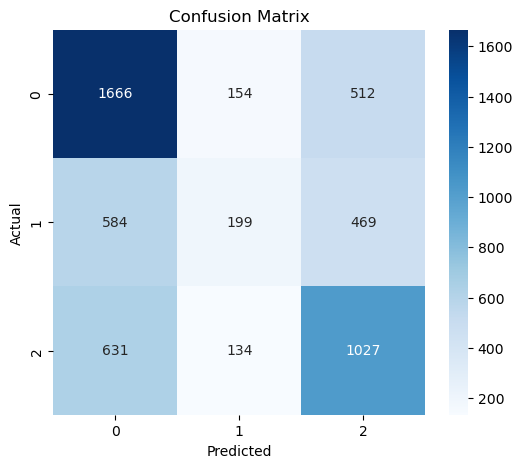

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def build_and_train_best_model_multiclass(X_train_scaled, y_train, X_test_scaled, y_test):
    # Parametri ottimizzati
    units_layer1 = 224
    units_layer2 = 160
    dropout_rate1 = 0.1
    dropout_rate2 = 0.5
    l2_rate = 0.0002708552306012994
    learning_rate = 0.0001

    # Costruzione del modello
    model = Sequential()
    model.add(Dense(
        units=units_layer1,
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(l2_rate)  # Regolarizzazione L2
    ))
    model.add(Dropout(dropout_rate1))  # Dropout dopo il primo livello

    model.add(Dense(
        units=units_layer2,
        activation='swish',
        kernel_regularizer=l2(l2_rate)  # Regolarizzazione L2
    ))
    model.add(Dropout(dropout_rate2))  # Dropout dopo il secondo livello

    # Modifica l'output per la classificazione multiclasse
    num_classes = len(np.unique(y_train))  # Determina il numero di classi
    model.add(Dense(num_classes, activation='softmax'))  # Livello di output per multiclasse

    # Compilazione del modello
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Modifica la funzione di perdita per target numerici
        metrics=['accuracy']
    )

    # Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Addestramento del modello
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        validation_split=0.2,
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Valutazione sul test set
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = y_pred_proba.argmax(axis=1)  # Predizione per la classe con la probabilità più alta

    # Stampa il classification report
    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualizzazione della cronologia dell'addestramento
    plt.figure(figsize=(12, 5))

    # Accuratezza
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train vs Validation Accuracy')

    # Perdita
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Validation Loss')

    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Restituisce il modello addestrato
    return model

# Esegui la funzione con i target numerici (0, 1, 2, 3)
model = build_and_train_best_model_multiclass(X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      2332
           1       0.40      0.14      0.21      1252
           2       0.54      0.65      0.59      1792

    accuracy                           0.57      5376
   macro avg       0.52      0.51      0.49      5376
weighted avg       0.54      0.57      0.53      5376



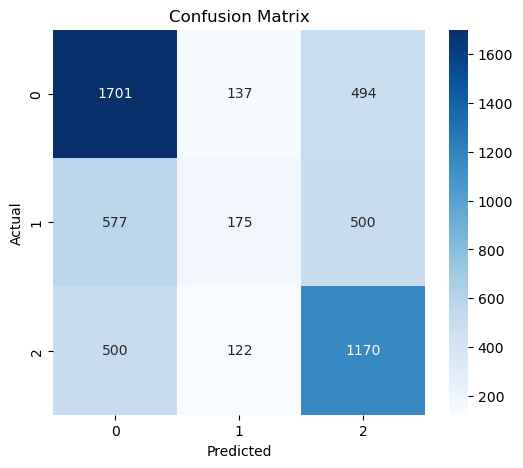

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Alleno il modello GB per la classificazione multiclass
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    random_state=42
)

# Adatto il modello ai dati
gb_model.fit(X_train_scaled, y_train)

# Previsioni sui dati di test
y_pred = gb_model.predict(X_test_scaled)

# Valutazioni del modello
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()